In [1]:
import os
import datetime

In [2]:
path_name = os.getcwd()
today = datetime.datetime.today()
month = today.strftime("%B")
year = today.year
folder = f"{month}{year}".lower()

In [21]:
from mta_gtfs_data_getter import download_gtfs_data

In [22]:
download_gtfs_data(folder)

Done! Check the october2019 folder


In [24]:
from mta_gtfs_shapefiles_maker import make_bus_routes_shapefiles, make_bus_stops_shapefiles, make_rail_routes_shapefiles, make_rail_stops_shapefiles, make_subway_entrances_shapefiles

In [25]:
rails = ["LIRR", "metro_north", "nyc_subway"]

In [26]:
for rail in rails:
    make_rail_routes_shapefiles(path=path_name, folder=folder, rail=rail)
    make_rail_stops_shapefiles(path=path_name, folder=folder, rail=rail)

Created route shapefiles for LIRR


/home/mixin/anaconda3/envs/mta/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Created stop shapefiles for LIRR
Created route shapefiles for metro_north
Created stop shapefiles for metro_north
Created route shapefiles for nyc_subway
Created stop shapefiles for nyc_subway


In [27]:
make_bus_routes_shapefiles(path=path_name, folder=folder)

Created line shapefiles for local and express bus routes


In [28]:
make_bus_stops_shapefiles(path=path_name, folder=folder)

Created stop shapefiles for local and express bus stops


In [29]:
make_subway_entrances_shapefiles(path=path_name, folder=folder)

Created subway entrances shapefiles


### Map shapefiles

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
routes_subway=gpd.read_file(f'./{folder}/shapes/routes_nyc_subway_{folder.lower()}.shp')
stops_subway=gpd.read_file(f'./{folder}/shapes/stops_nyc_subway_{folder.lower()}.shp')

In [5]:
routes_subway.head()

,route_id,route_shor,route_long,color,group,geometry
0,1,1,Broadway - 7 Avenue Local,#EE352E,123,(LINESTRING (1011699.308073616 261696.57842129...
1,2,2,7 Avenue Express,#EE352E,123,(LINESTRING (998782.4946027491 169839.93930443...
2,3,3,7 Avenue Express,#EE352E,123,(LINESTRING (1016408.940629264 182025.04985507...
3,4,4,Lexington Avenue Express,#00933C,456,(LINESTRING (1014855.184032474 257720.67239649...
4,5,5,Lexington Avenue Express,#00933C,456,(LINESTRING (980249.6396473306 195807.80030096...


In [6]:
stops_subway.head()

,stop_id,stop_name,stop_lat,stop_lon,trains,structure,stop_id2,GEOID,NAMELSAD,geometry
0,101,Van Cortlandt Park - 242 St,40.889248,-73.898583,1,Elevated,None,36005,Bronx County,POINT (1012291.155985304 263271.2080455146)
1,103,238 St,40.884667,-73.900870,1,Elevated,None,36005,Bronx County,POINT (1011660.704076381 261601.4418330777)
2,104,231 St,40.878856,-73.904834,1,Elevated,None,36005,Bronx County,POINT (1010566.908281725 259483.0473639019)
3,201,Wakefield - 241 St,40.903125,-73.850620,2,Elevated,None,36005,Bronx County,POINT (1025543.987933483 268346.1455741516)
4,204,Nereid Av,40.898379,-73.854376,2 5,Elevated,None,36005,Bronx County,POINT (1024508.570440806 266615.2355489098)


In [7]:
routes_subway.crs

{'init': 'epsg:2263'}

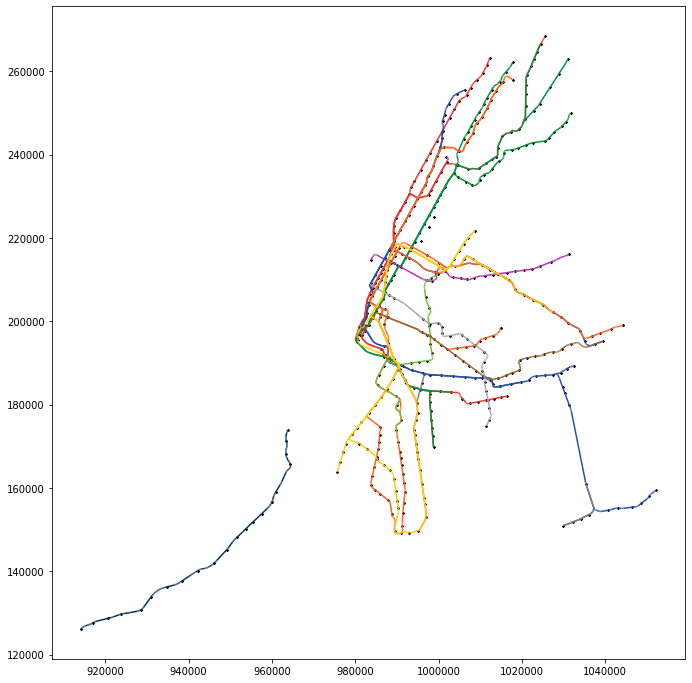

In [8]:
def plotRoutesAndStops(ax, routes, stops):
    #plot each color group
    for color in list(routes.color.unique()):
        routes[routes.color == color].plot(color= color, ax = ax)
    #plot subway stops
        stops.plot(color = 'black', ax = ax,  markersize = 0.5)
        
fig, ax = plt.subplots(figsize=(12,12))
plotRoutesAndStops(ax, routes_subway, stops_subway)

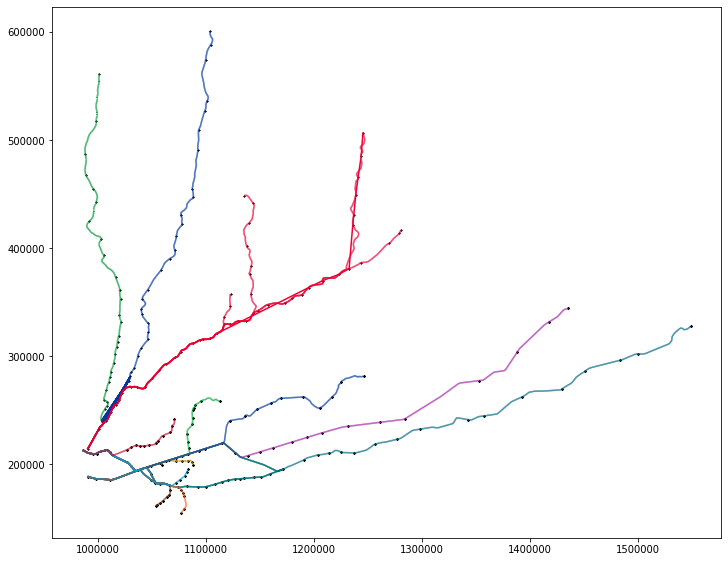

In [9]:
#plot both the Metro North and Long Island Railroad
routes_metro_north=gpd.read_file(f'./{folder}/shapes/routes_metro_north_{folder.lower()}.shp')
stops_metro_north=gpd.read_file(f'./{folder}/shapes/stops_metro_north_{folder.lower()}.shp')
routes_LIRR=gpd.read_file(f'./{folder}/shapes/routes_LIRR_{folder.lower()}.shp')
stops_LIRR=gpd.read_file(f'./{folder}/shapes/stops_LIRR_{folder.lower()}.shp')

fig, ax = plt.subplots(figsize=(12,12))
plotRoutesAndStops(ax, routes_metro_north, stops_metro_north)
plotRoutesAndStops(ax, routes_LIRR, stops_LIRR)

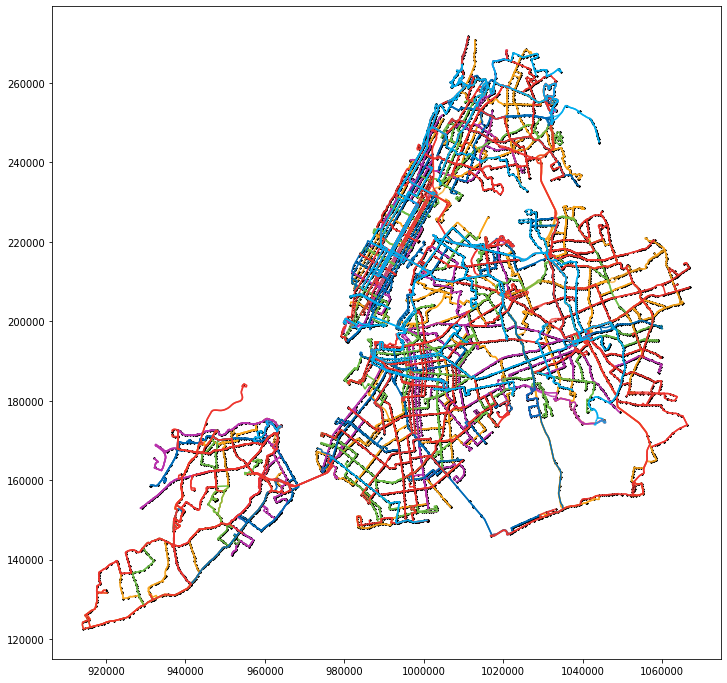

In [12]:
#do the same for buses
routes_bus = gpd.read_file(f'./{folder}/shapes/bus_routes_nyc_{folder.lower()}.shp')
stops_bus = gpd.read_file(f'./{folder}/shapes/bus_stops_nyc_{folder.lower()}.shp')
fig, ax = plt.subplots(figsize=(12,12))
plotRoutesAndStops(ax, routes_bus, stops_bus)

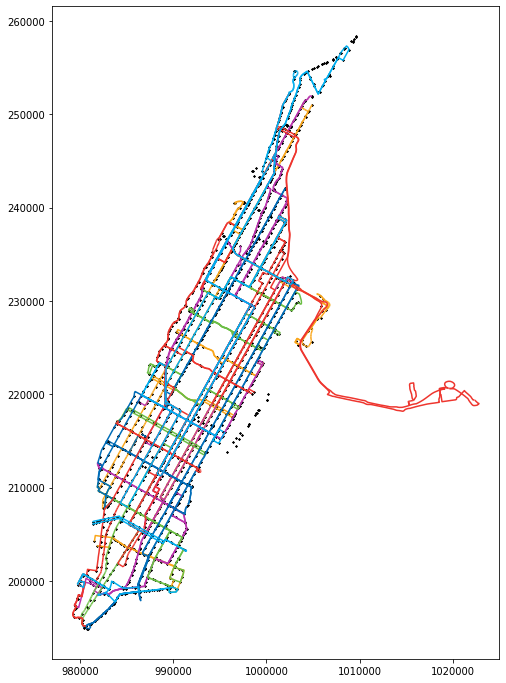

In [22]:
#map only a boro
fig, ax = plt.subplots(figsize=(12,12))
mn_routes_bus = routes_bus[routes_bus.route_id.str.contains('M')]
mn_routes_stops = stops_bus[stops_bus.NAMELSAD == 'New York County']
plotRoutesAndStops(ax, mn_routes_bus, mn_routes_stops)

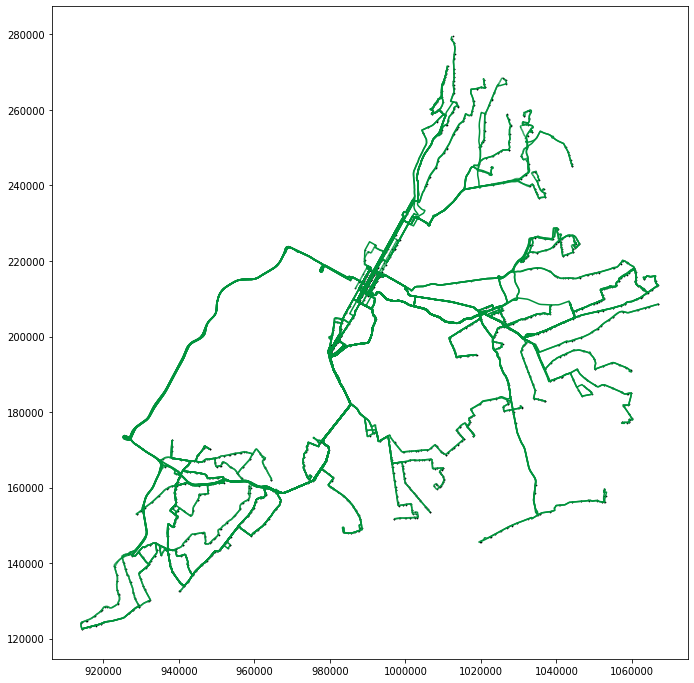

In [23]:
#express buses
routes_express_bus = gpd.read_file(f'./{folder}/shapes/express_bus_routes_nyc_{folder.lower()}.shp')
stops_express_bus = gpd.read_file(f'./{folder}/shapes/express_bus_stops_nyc_{folder.lower()}.shp')
fig, ax = plt.subplots(figsize=(12,12))
plotRoutesAndStops(ax, routes_express_bus, stops_express_bus)